In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\Aswini\Downloads\eda assignment\Bengaluru house price prediction\Bengaluru_House_Data.csv")
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

#### i will drop area type,availability,balcony,soceity  beacause it is of no use for my predictor, since no one will use these features to search a house or would want to know the price using those features

In [6]:
df.drop(['area_type','availability','balcony','society'],inplace=True,axis=1)

In [7]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [9]:
df.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


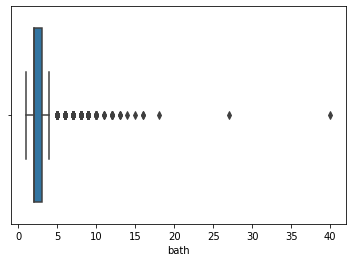

In [10]:
sns.boxplot(df['bath'])
plt.show()

In [11]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [12]:
df['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [13]:
df['location'].fillna('Whitefield',inplace=True)

In [14]:
df['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [15]:
df['size'].fillna('2 BHK',inplace=True)

In [16]:
df['bath'].value_counts().head()

2.0    6908
3.0    3286
4.0    1226
1.0     788
5.0     524
Name: bath, dtype: int64

In [17]:
median=df['bath'].median()
median

2.0

In [18]:
df['bath'].fillna(median,inplace=True)

In [19]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [20]:
df['bhk']=df['size'].str.split(' ').str.get(0).astype(int)

In [21]:
df[df['bhk']>25]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [22]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [23]:
def convert(x):
    num=x.split('-')
    if len(num)==2:
        return (float(num[0])+float(num[1]))/2
    else:
        try:
            return float(x)
        except:
            return None

In [24]:
df['total_sqft']=df['total_sqft'].apply(convert)

In [25]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


#### i will create another feature priceper sqft because people usually search houses using this rate

In [26]:
df['price_per_sqft']=df['price']*100000/df['total_sqft']

In [27]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [28]:

location_count=df['location'].value_counts()
count_less_than_10=location_count[location_count<=10]
count_less_than_10

Kalkere                           10
Gunjur Palya                      10
Dodsworth Layout                  10
BTM 1st Stage                     10
Sadashiva Nagar                   10
                                  ..
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
singapura paradise                 1
Abshot Layout                      1
Name: location, Length: 1064, dtype: int64

In [29]:
df['location']=df['location'].apply(lambda x:'others' if x in count_less_than_10 else x )

In [30]:
df['location'].value_counts()

others                2900
Whitefield             541
Sarjapur  Road         399
Electronic City        302
Kanakpura Road         273
                      ... 
Marsur                  11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: location, Length: 242, dtype: int64

In [31]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [32]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


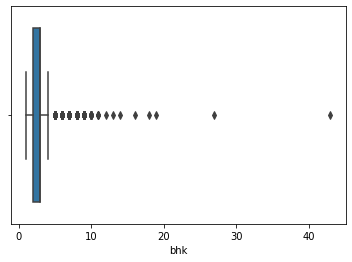

In [33]:
sns.boxplot(df['bhk'])
plt.show()

In [34]:
(df['total_sqft']/df['bhk']).describe()

count    13274.000000
mean       575.074878
std        388.205175
min          0.250000
25%        473.333333
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

In [35]:
df=df[(df['total_sqft']/df['bhk'])>=300]

In [36]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.559537,111.382401,2.650838,6303.979357
std,1261.271296,1.077938,152.077329,0.976678,4162.237981
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1116.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


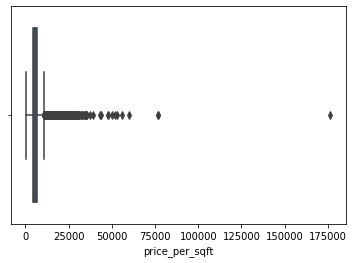

In [37]:
sns.boxplot(df['price_per_sqft'])
plt.show()

In [38]:
df['price_per_sqft'].quantile([0.1,0.5,0.75,0.9,0.95,0.99,1])

0.10      3500.000000
0.50      5294.117647
0.75      6916.666667
0.90     10000.000000
0.95     13333.333333
0.99     21707.942637
1.00    176470.588235
Name: price_per_sqft, dtype: float64

In [39]:
## here we can see that there is huge gapbetween 99 percentile and 100...so they are are outliers 
### so i will take only those houses who have rate less tahan 25000 rs per sqft

D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


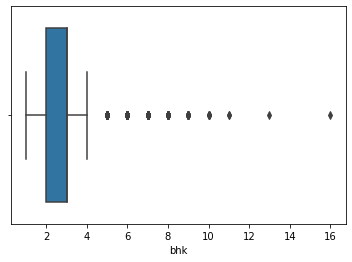

In [40]:
sns.boxplot(df['bhk'])
plt.show()

In [41]:

df.shape

(12530, 7)

In [42]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,others,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [48]:
def remove_outliers_sqft(df):
    df_output=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=subdf['price_per_sqft'].mean()
        st=subdf['price_per_sqft'].std()
        gen_df=subdf[(subdf['price_per_sqft']>(m-st)) & (subdf['price_per_sqft']<=(m+st))]
        df_output=pd.concat([df_output,gen_df],ignore_index=True)
    return df_output

df=remove_outliers_sqft(df)
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,10353.000000,10353.000000,10353.000000,10353.000000,10353.000000
mean,1508.578934,2.472327,91.339397,2.575292,5660.848288
std,879.908089,0.980604,86.416581,0.898627,2270.910791
min,300.000000,1.000000,10.000000,1.000000,1250.000000
25%,1109.000000,2.000000,49.000000,2.000000,4239.631336
50%,1286.000000,2.000000,67.000000,2.000000,5175.600739
75%,1650.000000,3.000000,100.000000,3.000000,6432.748538
max,30400.000000,16.000000,2200.000000,16.000000,24509.803922


In [57]:
df.shape

(10353, 7)

In [58]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Devarachikkanahalli,3 BHK,1250.0,2.0,44.00,3,3520.000000
1,Devarachikkanahalli,2 BHK,1250.0,2.0,40.00,2,3200.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.00,2,6916.666667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,40.00,2,3418.803419
4,Devarachikkanahalli,3 BHK,1425.0,2.0,65.00,3,4561.403509
...,...,...,...,...,...,...,...
10348,others,2 BHK,1353.0,2.0,110.00,2,8130.081301
10349,others,1 Bedroom,812.0,1.0,26.00,1,3201.970443
10350,others,3 BHK,1440.0,2.0,63.93,3,4439.583333
10351,others,2 BHK,1075.0,2.0,48.00,2,4465.116279


In [60]:
##dropping zize and price_per_sqft col 
df.drop(['size','price_per_sqft'],inplace=True,axis=1)

#### cleaned data

In [62]:
df.head()

,location,total_sqft,bath,price,bhk
0,Devarachikkanahalli,1250.0,2.0,44.0,3
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,65.0,3


In [63]:
df.to_csv('cleaned_data.csv')

In [64]:
X=df.drop('price',axis=1)

In [67]:
Y=df['price']

In [68]:
from sklearn.model_selection import train_test_split

In [70]:

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [72]:
print(X_train.shape)
print(X_test.shape)

(8282, 4)
(2071, 4)


In [89]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

#### Applying linear regression

In [79]:
column_trans=make_column_transformer((OneHotEncoder(sparse=False),['location']),remainder='passthrough')

In [81]:
scaler=StandardScaler()

In [82]:
lr=LinearRegression(normalize=True)

In [85]:
pipe=make_pipeline(column_trans,scaler,lr)### pipeline where 3 processes will be done one by one

In [86]:
pipe.fit(X_train,Y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=False),
                                                  ['location'])],
                                   verbose=False)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregressio

In [87]:
y_pred_lr=pipe.predict(X_test)

In [90]:
r2_score(Y_test,y_pred_lr)

0.8559858776927913

#### Applying lasso

In [91]:
lasso=Lasso()


In [94]:
pipe=make_pipeline(column_trans,scaler,lasso)

In [95]:
pipe.fit(X_train,Y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=False),
                                                  ['location'])],
                                   verbose=False)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lasso',
       

In [96]:
y_pred_lasso=pipe.predict(X_test)

In [97]:
r2_score(Y_test,y_pred_lasso)

0.8415610299866636

#### applying Ridge

In [100]:
ridge=Ridge()

In [101]:
pipe=make_pipeline(column_trans,scaler,ridge)

In [102]:
pipe.fit(X_train,Y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=False),
                                                  ['location'])],
                                   verbose=False)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('ridge',
       

In [103]:
y_pred_ridge=pipe.predict(X_test)

In [104]:
r2_score(Y_test,y_pred_ridge)

0.8558941053069291

In [106]:
print('linear',':',r2_score(Y_test,y_pred_lr))
print('lasso',':',r2_score(Y_test,y_pred_lasso))
print('ridge',':',r2_score(Y_test,y_pred_ridge))

linear : 0.8559858776927913
lasso : 0.8415610299866636
ridge : 0.8558941053069291


#### so i will take ridge 

In [107]:
import pickle
pickle.dump(pipe,open('Ridge_model.pkl','wb'))